In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openpyxl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [2]:
df = pd.read_csv('Datos/Nacionalidad_clean.csv',sep=';')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123234 entries, 0 to 123233
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   nacionalidad      123234 non-null  object
 1   grupo_edad        123234 non-null  object
 2   sexo              123234 non-null  object
 3   fecha_convertida  123234 non-null  object
 4   mes               123234 non-null  int64 
 5   año               123234 non-null  int64 
 6   periodo           123234 non-null  object
 7   total             123234 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 7.5+ MB


In [4]:
df['fecha_convertida'] = pd.to_datetime(df['fecha_convertida'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123234 entries, 0 to 123233
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   nacionalidad      123234 non-null  object        
 1   grupo_edad        123234 non-null  object        
 2   sexo              123234 non-null  object        
 3   fecha_convertida  123234 non-null  datetime64[ns]
 4   mes               123234 non-null  int64         
 5   año               123234 non-null  int64         
 6   periodo           123234 non-null  object        
 7   total             123234 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 7.5+ MB


In [6]:
df.describe()

,fecha_convertida,mes,año,total
count,123234,123234.000000,123234.000000,1.232340e+05
mean,2013-01-19 09:11:29.361702400,4.191489,2013.042553,2.104035e+04
min,2002-01-01 00:00:00,1.000000,2002.000000,0.000000e+00
25%,2007-01-07 00:00:00,1.000000,2007.000000,1.340000e+02
50%,2013-01-07 00:00:00,4.000000,2013.000000,6.680000e+02
75%,2019-01-07 00:00:00,7.000000,2019.000000,2.702000e+03
max,2023-01-01 00:00:00,10.000000,2023.000000,1.765688e+06
std,NaN,3.119194,6.477343,1.397078e+05


In [7]:
df.shape

(123234, 8)

In [8]:
missing_data = df.isna().sum()
print(missing_data)

nacionalidad        0
grupo_edad          0
sexo                0
fecha_convertida    0
mes                 0
año                 0
periodo             0
total               0
dtype: int64


In [9]:
df['nacionalidad'].unique().shape

(71,)

In [10]:
df.groupby('fecha_convertida')['total'].sum()

fecha_convertida
2002-01-01    44509270
2002-01-07    45539160
2003-01-01    46549581
2003-01-07    47488662
2004-01-01    48346539
2004-01-07    49079336
2005-01-01    50153958
2005-01-07    51083796
2006-01-01    51868817
2006-01-07    52675202
2007-01-01    53680308
2007-01-07    54814004
2008-01-01    55838301
2008-01-07    56510795
2009-01-01    57009312
2009-01-07    57224761
2010-01-01    57288665
2010-01-07    57267014
2011-01-01    57289078
2011-01-07    57272255
2012-01-01    57287261
2012-01-07    57019772
2013-01-01    56838759
2013-01-07    56303324
2014-01-01    55845086
2014-01-07    55472310
2015-01-01    55329962
2015-01-07    55209358
2016-01-01    55253610
2016-01-07    55194648
2017-01-01    55328463
2017-01-07    55407646
2018-01-01    55794849
2018-01-07    56056253
2019-01-01    56614994
2019-01-07    57149334
2020-01-01    57794428
2020-01-07    58028913
2021-01-01    58199552
2021-01-04    58121582
2021-01-07    58077485
2021-01-10    58289219
2022-01-01    584

In [11]:
df_01_2002 = df[df['fecha_convertida'] == '2002-01-01']
df_01_2002_nacionalidad = df_01_2002.groupby('nacionalidad')['total'].sum().reset_index()
df_01_2002_nacionalidad.columns = ['Nacionalidad','Suma-poblacion']
df_01_2002_nacionalidad

,Nacionalidad,Suma-poblacion
0,Alemania,85243
1,Apátridas,386
2,Argelia,24525
3,Argentina,53416
4,Bangladesh,1743
...,...,...
64,Suecia,9616
65,Suiza,11403
66,Ucrania,25275
67,Uruguay,10689


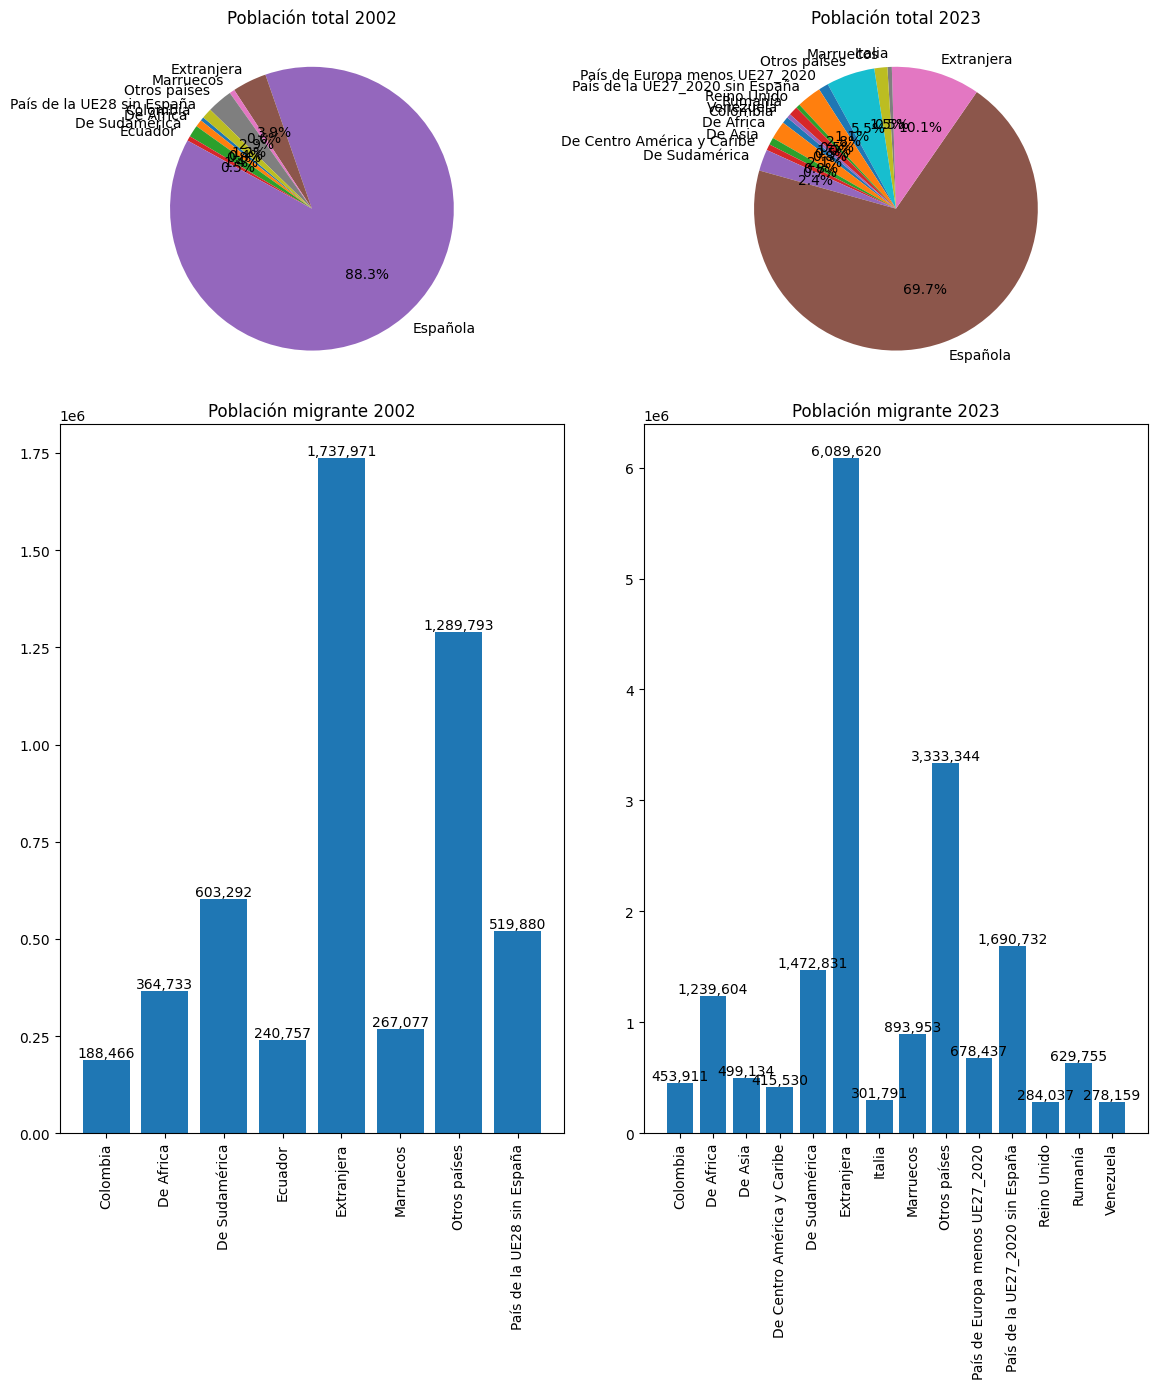

In [12]:
import matplotlib.gridspec as gridspec
# Crear data frames de inicio
df_01_2002 = df[df['fecha_convertida'] == '2002-01-01']
df_01_2002_nacionalidad = df_01_2002.groupby('nacionalidad')['total'].sum().reset_index()
df_01_2002_nacionalidad.columns = ['Nacionalidad', 'Suma-poblacion']

df_ordenado = df_01_2002_nacionalidad.sort_values(by='Suma-poblacion', ascending=False)
df_ordenado['Participacion'] = (df_ordenado['Suma-poblacion'] / df_ordenado['Suma-poblacion'].sum()) * 100
df_ordenado['Nacionalidad_graficar'] = np.where(df_ordenado['Participacion'] > 0.4, df_ordenado['Nacionalidad'], 'Otros países')
df_ordenado1 = df_ordenado.groupby('Nacionalidad_graficar')['Suma-poblacion'].sum().reset_index()
df_ordenado1.columns = ['Nacionalidad_graficar', 'Suma-poblacion']
df_ordenado2 = df_ordenado1[df_ordenado1['Nacionalidad_graficar'] != 'Española']

# Crear data frames de final 
df_01_2023 = df[df['fecha_convertida'] == '2023-01-01']
df_01_2023_nacionalidad = df_01_2023.groupby('nacionalidad')['total'].sum().reset_index()
df_01_2023_nacionalidad.columns = ['Nacionalidad', 'Suma-poblacion']

df_ordenado_3 = df_01_2023_nacionalidad.sort_values(by='Suma-poblacion', ascending=False)
df_ordenado_3['Participacion'] = (df_ordenado_3['Suma-poblacion'] / df_ordenado_3['Suma-poblacion'].sum()) * 100
df_ordenado_3['Nacionalidad_graficar'] = np.where(df_ordenado_3['Participacion'] > 0.4, df_ordenado_3['Nacionalidad'], 'Otros países')
df_ordenado4 = df_ordenado_3.groupby('Nacionalidad_graficar')['Suma-poblacion'].sum().reset_index()
df_ordenado4.columns = ['Nacionalidad_graficar', 'Suma-poblacion']
df_ordenado5 = df_ordenado4[df_ordenado4['Nacionalidad_graficar'] != 'Española']

# Configuración de la figura con gridspec
fig = plt.figure(figsize=(12, 14))
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 3])  # Ajustar la altura de la segunda fila

# Gráfico circular 2002
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(df_ordenado1['Suma-poblacion'], labels=df_ordenado1['Nacionalidad_graficar'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Población total 2002')

# Gráfico circular 2023
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(df_ordenado4['Suma-poblacion'], labels=df_ordenado4['Nacionalidad_graficar'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Población total 2023')

# Gráfico de barras 2002
ax3 = fig.add_subplot(gs[1, 0])
bars_2002 = ax3.bar(df_ordenado2['Nacionalidad_graficar'], df_ordenado2['Suma-poblacion'])
ax3.set_title('Población migrante 2002')
# Añadir valores en las barras con etiquetas verticales
for bar in bars_2002:
    ax3.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

# Gráfico de barras 2023
ax4 = fig.add_subplot(gs[1, 1])
bars_2023 = ax4.bar(df_ordenado5['Nacionalidad_graficar'], df_ordenado5['Suma-poblacion'])
ax4.set_title('Población migrante 2023')
# Añadir valores en las barras con etiquetas verticales
for bar in bars_2023:
    ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

# Rotar etiquetas del eje x a 90 grados
ax3.tick_params(axis='x', rotation=90)
ax4.tick_params(axis='x', rotation=90)

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


No entiendo , a que se refiere extranjera 

In [13]:
# comparemos las variaciones 

df_merge = df_ordenado1.merge(df_ordenado4,how = 'inner',on = 'Nacionalidad_graficar' , suffixes = ('_2002','_2023'))
df_merge['Variacion'] = ((df_merge['Suma-poblacion_2023'] / df_merge['Suma-poblacion_2002'])-1)*100
paises = df_merge['Nacionalidad_graficar'].unique()



In [14]:
df_nacionalidades_año = df.groupby(['nacionalidad','año'])['total'].sum().reset_index()
df_nacionalidades_año = df_nacionalidades_año[df_nacionalidades_año['nacionalidad'].isin(paises)]
df_nacionalidades_año = df_nacionalidades_año[df_nacionalidades_año['nacionalidad'] != 'Española']

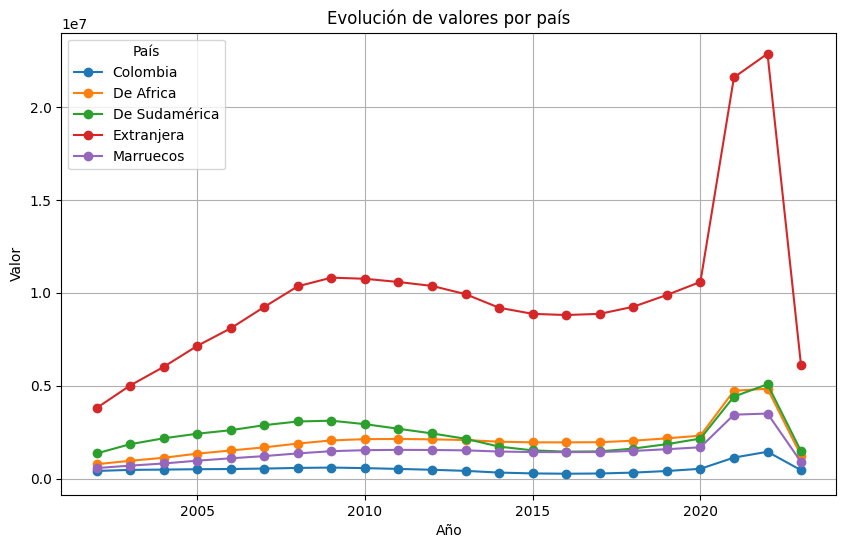

In [15]:
plt.figure(figsize=(10, 6))

for pais in df_nacionalidades_año['nacionalidad'].unique():
    df_pais = df_nacionalidades_año[df_nacionalidades_año['nacionalidad'] == pais]
    plt.plot(df_pais['año'], df_pais['total'], marker='o', label=pais)

plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Evolución de valores por país')
plt.legend(title='País')
plt.grid(True)
plt.show()


Vemos una caida en casi todos para el ultimo periodo , voy analizar si la subida corresponde correctamente o son datos atipicos que no deberiamos tomar 

Text(0.5, 1.0, 'Evolución poblacion total por periodos')

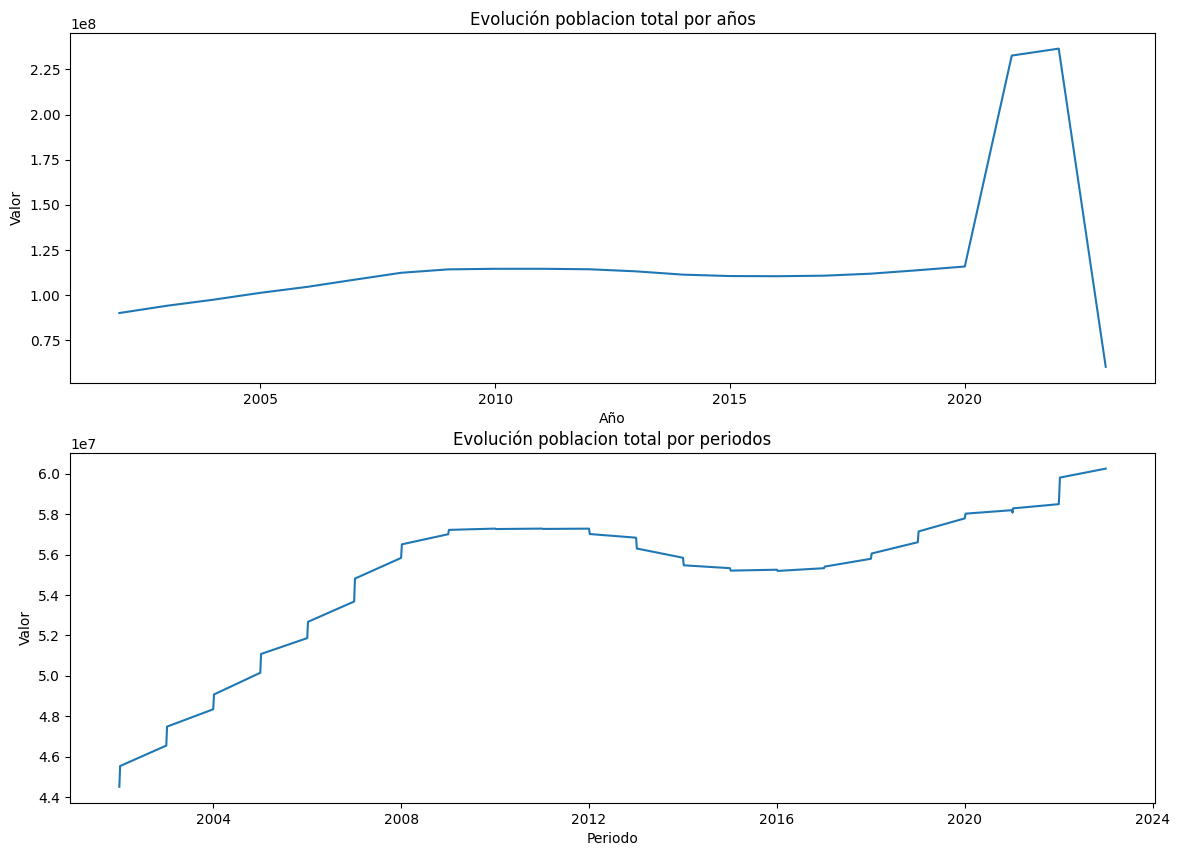

In [16]:
# Quiero mirar si tenemos outlyers 
df_periodo = df.groupby('año')['total'].sum().reset_index()
df_periodo2 = df.groupby('fecha_convertida')['total'].sum().reset_index()


fig , ax = plt.subplots( nrows = 2 , ncols = 1 , figsize =(14,10))
ax[0].plot(df_periodo['año'],df_periodo['total'])
ax[1].plot(df_periodo2['fecha_convertida'],df_periodo2['total'])

ax[0].set_xlabel('Año')
ax[0].set_ylabel('Valor')
ax[0].set_title('Evolución poblacion total por años')

ax[1].set_xlabel('Periodo')
ax[1].set_ylabel('Valor')
ax[1].set_title('Evolución poblacion total por periodos')

la caida se da ya que tenemos solo un periodo en el 2023 , entonces tomaremos la informacion por meses para nuestro analisis , ya que si lo vemos por periodo tiene un comportamiento normal ,  se entiende como periodo el intervalo de tiempo de un mes 

Tambien cabe aclarar que la diferencias entre los comportamientos entre la grafica por año y perio se debe a que algunos años tienen mas registros que los primeros 

In [47]:
df_periodo = df.groupby(['año','mes'])['total'].sum().reset_index()

df_periodo.groupby(['año'])['mes'].nunique()

año
2002    2
2003    2
2004    2
2005    2
2006    2
2007    2
2008    2
2009    2
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
2020    2
2021    4
2022    4
2023    1
Name: mes, dtype: int64

Ahora miremos el comportamiento por grupo de edad 

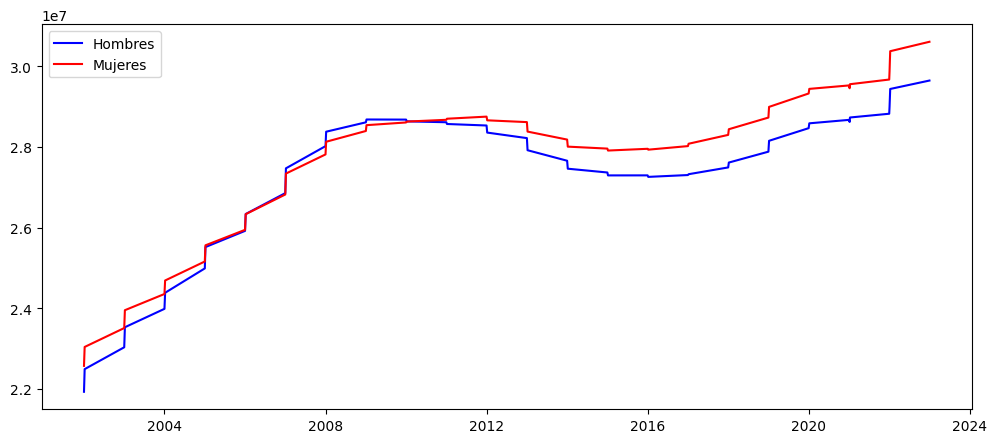

In [17]:
# Creacion de data frames 

df_sexo = df.groupby(['fecha_convertida','sexo'])['total'].sum().reset_index()
df_mujeres = df_sexo[df_sexo['sexo'] == 'Mujeres']
df_hombres = df_sexo[df_sexo['sexo'] == 'Hombres']

fig , ax = plt.subplots(figsize = (12,5))

ax.plot(df_hombres['fecha_convertida'], df_hombres['total'],color = 'Blue', label = 'Hombres')
ax.plot(df_mujeres['fecha_convertida'], df_mujeres['total'],color = 'red', label = 'Mujeres')
ax.legend()


podemos ver que en toda la historia tenemos mayor numero de mujeres que de hombre en toda la historia 

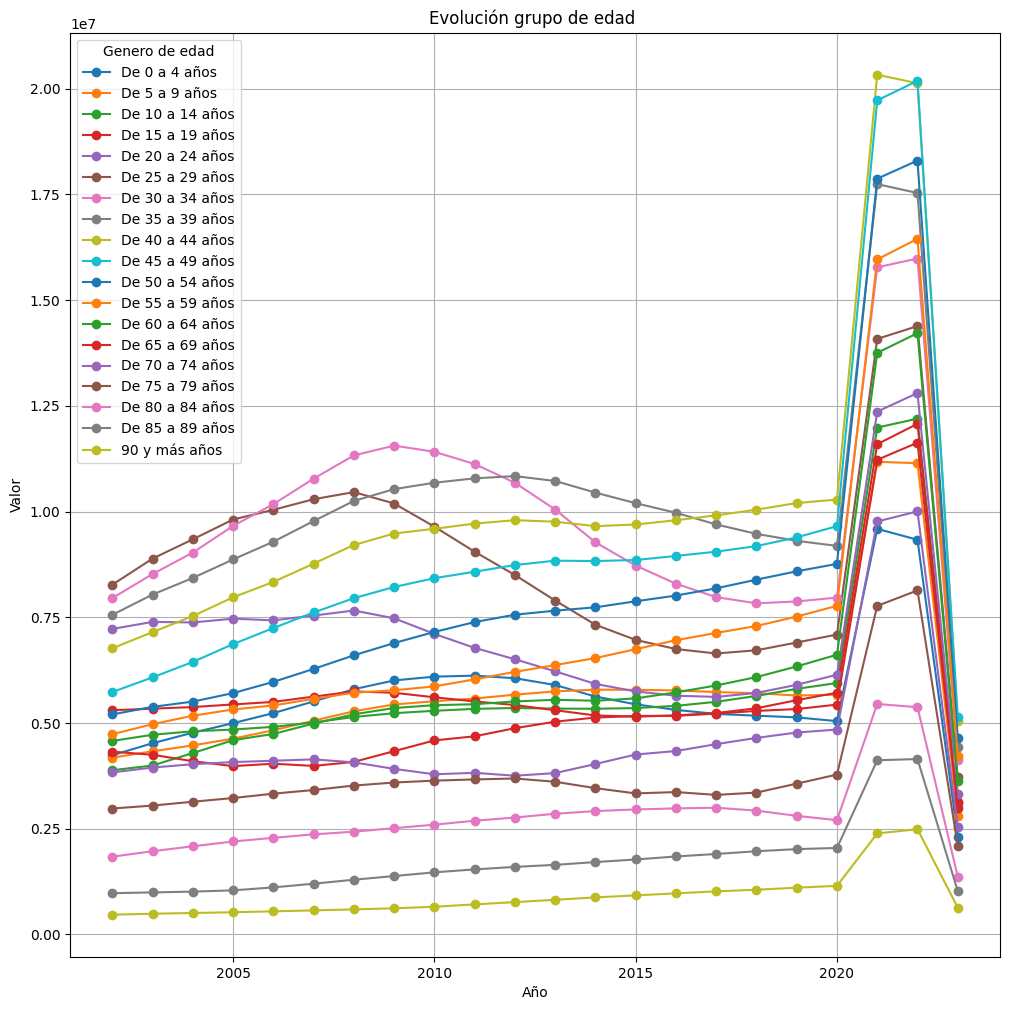

In [18]:
# Veamos la distribucion por rango de edades 
df_edades = df.groupby(['grupo_edad','año'])['total'].sum().reset_index()

plt.figure(figsize =(12,12))

for i in df['grupo_edad'].unique():
       df_grupo_edad = df_edades[df_edades['grupo_edad'] == i]
       plt.plot(df_grupo_edad['año'],df_grupo_edad['total'],marker='o', label=i) 


plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Evolución grupo de edad ')
plt.legend(title='Genero de edad')
plt.grid(True)
plt.show()
    





Podemos notar una caida en las personas mayores en el rango de 50-70 desde 2009 hasta mediados de 2015 donde empieza otra vez a tener un crecimiento , para las otras grupos de edad vemos un comportamiento normal 

Entondas las graficas podemos notar un incremento bastante brusco en el periodo 2020 le voy a hacer un zoom para ver si esos valores  tienen sentido 

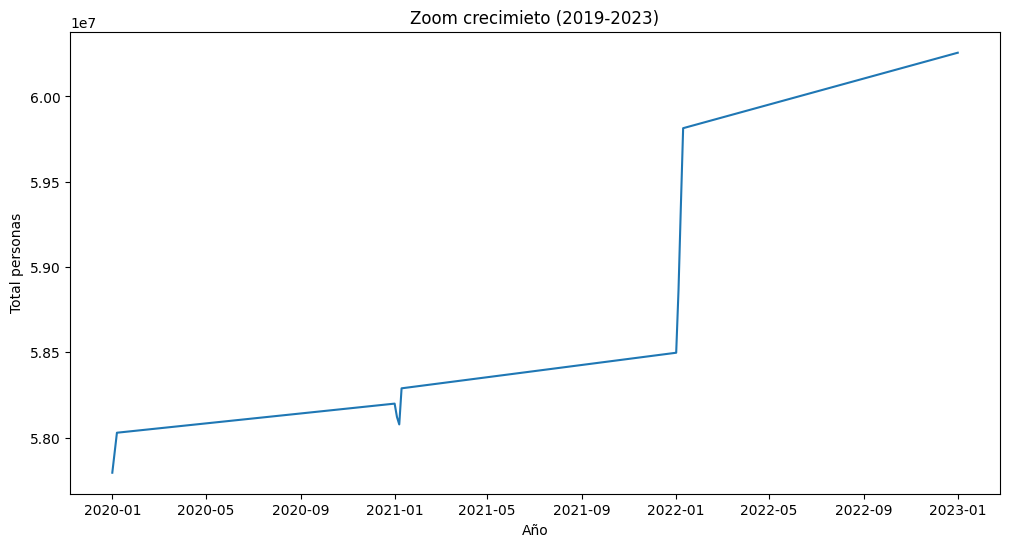

In [19]:
df_19 = df[df['año']>2019]

df_19 = df_19.groupby('fecha_convertida')['total'].sum().reset_index()
df_19

plt.figure(figsize=(12,6))

plt.plot(df_19['fecha_convertida'],df_19['total'])
plt.xlabel('Año')
plt.ylabel('Total personas')
plt.title('Zoom crecimieto (2019-2023)')
plt.show()

No logro identificar por que la subida tan drastica entre el periodo 2021-07 y el periodo 2022-01

In [20]:
df_01_2002.groupby('grupo_edad')['total'].sum()

grupo_edad
90 y más años       231149
De 0 a 4 años      2086511
De 10 a 14 años    2271838
De 15 a 19 años    2647080
De 20 a 24 años    3580725
De 25 a 29 años    4049395
De 30 a 34 años    3899583
De 35 a 39 años    3714436
De 40 a 44 años    3335102
De 45 a 49 años    2824162
De 5 a 9 años      2073875
De 50 a 54 años    2576883
De 55 a 59 años    2337775
De 60 a 64 años    1935165
De 65 a 69 años    2169020
De 70 a 74 años    1901858
De 75 a 79 años    1483327
De 80 a 84 años     903912
De 85 a 89 años     487474
Name: total, dtype: int64

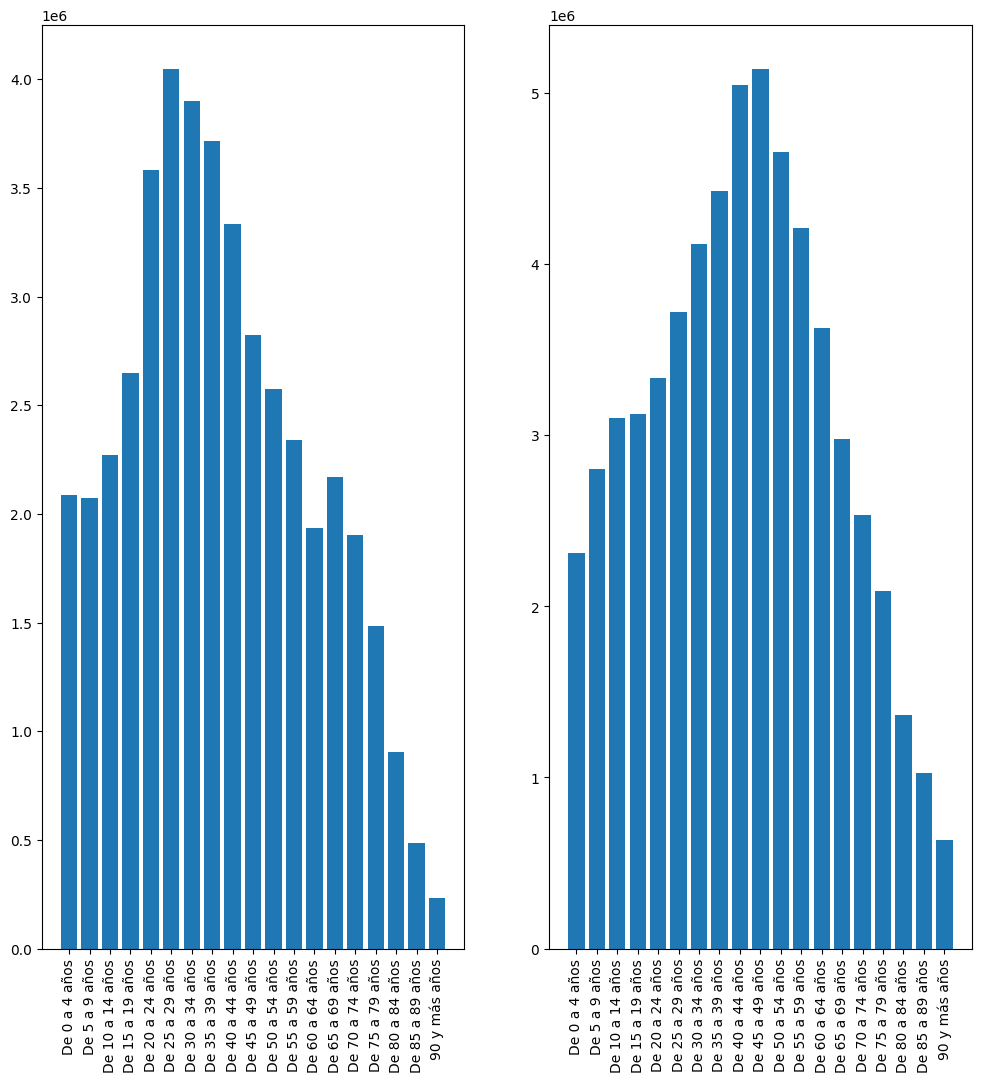

In [21]:

import re

df_i = df_01_2002.groupby('grupo_edad')['total'].sum().reset_index()
df_f = df_01_2023.groupby('grupo_edad')['total'].sum().reset_index()

def parse_age_range(age_range):
    # If it's "90 y más años", set it to [90, 100] (or some high number)
    if 'más' in age_range:
        return [90, 100]  # You can adjust the upper bound if needed
    
    # Extract the numbers from the range using regex
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    
    # Return the range as a list, e.g., "De 0 a 4 años" -> [0, 4]
    return numbers

# Apply the function to the age ranges and create a new dataframe

df_i['Intervalo_edad'] = [parse_age_range(age) for age in df_i['grupo_edad'].unique()]
df_f['Intervalo_edad'] = [parse_age_range(age) for age in df_f['grupo_edad'].unique()]

df_i = df_i.sort_values(by = 'Intervalo_edad')
df_f = df_f.sort_values(by = 'Intervalo_edad')

fig , ax = plt.subplots(nrows = 1 , ncols = 2, figsize=(12,12) )

ax[0].bar(df_i['grupo_edad'],df_i['total'])
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(df_f['grupo_edad'],df_f['total'])
ax[1].tick_params(axis='x', rotation=90)

plt.show()


Podemos notar un comportamiento muy normal en la distribuion , en 2002 las mayoria de personas estaban concentradas entre los 20 y 30 años , y para el 2023 vemos que esa poblacion se movio entre los 40 y 60 , un movimiento muy natural , pero tambien podemos observar que esa poblacion crecio en mas de un millon , esto se puede deber al volumen de migrantes que han entrado al pais , trataremos de demostar esta hipotesis 

In [22]:
# aplicar la funcion definida anteriormente al dataframe original 
df['Intervalo_edad'] = [parse_age_range(age) for age in df['grupo_edad']]
df


,nacionalidad,grupo_edad,sexo,fecha_convertida,mes,año,periodo,total,Intervalo_edad
0,Española,De 0 a 4 años,Hombres,2023-01-01,1,2023,01-2023,781972,"[0, 4]"
1,Española,De 0 a 4 años,Hombres,2022-01-10,10,2022,10-2022,788831,"[0, 4]"
2,Española,De 0 a 4 años,Hombres,2022-01-07,7,2022,07-2022,796026,"[0, 4]"
3,Española,De 0 a 4 años,Hombres,2022-01-04,4,2022,04-2022,801636,"[0, 4]"
4,Española,De 0 a 4 años,Hombres,2022-01-01,1,2022,01-2022,809127,"[0, 4]"
...,...,...,...,...,...,...,...,...,...
123229,Extranjera,90 y más años,Mujeres,2004-01-01,1,2004,01-2004,1912,"[90, 100]"
123230,Extranjera,90 y más años,Mujeres,2003-01-07,7,2003,07-2003,1788,"[90, 100]"
123231,Extranjera,90 y más años,Mujeres,2003-01-01,1,2003,01-2003,1615,"[90, 100]"
123232,Extranjera,90 y más años,Mujeres,2002-01-07,7,2002,07-2002,1486,"[90, 100]"


In [23]:
df_01_2002

,nacionalidad,grupo_edad,sexo,fecha_convertida,mes,año,periodo,total
46,Española,De 0 a 4 años,Hombres,2002-01-01,1,2002,01-2002,957280
93,Española,De 0 a 4 años,Mujeres,2002-01-01,1,2002,01-2002,907266
140,Española,De 5 a 9 años,Hombres,2002-01-01,1,2002,01-2002,938597
187,Española,De 5 a 9 años,Mujeres,2002-01-01,1,2002,01-2002,890022
234,Española,De 10 a 14 años,Hombres,2002-01-01,1,2002,01-2002,1037973
...,...,...,...,...,...,...,...,...
123045,Extranjera,De 80 a 84 años,Mujeres,2002-01-01,1,2002,01-2002,5249
123092,Extranjera,De 85 a 89 años,Hombres,2002-01-01,1,2002,01-2002,1971
123139,Extranjera,De 85 a 89 años,Mujeres,2002-01-01,1,2002,01-2002,2770
123186,Extranjera,90 y más años,Hombres,2002-01-01,1,2002,01-2002,882


/var/folders/_g/hjhxwzz574s2llr20k2xggsw0000gn/T/ipykernel_19485/2903559992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01_2002['EspVsExt'] = np.where(df_01_2002['nacionalidad'] == 'Española', 'Española', 'Extranjeros')
/var/folders/_g/hjhxwzz574s2llr20k2xggsw0000gn/T/ipykernel_19485/2903559992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01_2023['EspVsExt'] = np.where(df_01_2023['nacionalidad'] == 'Española', 'Española', 'Extranjeros')


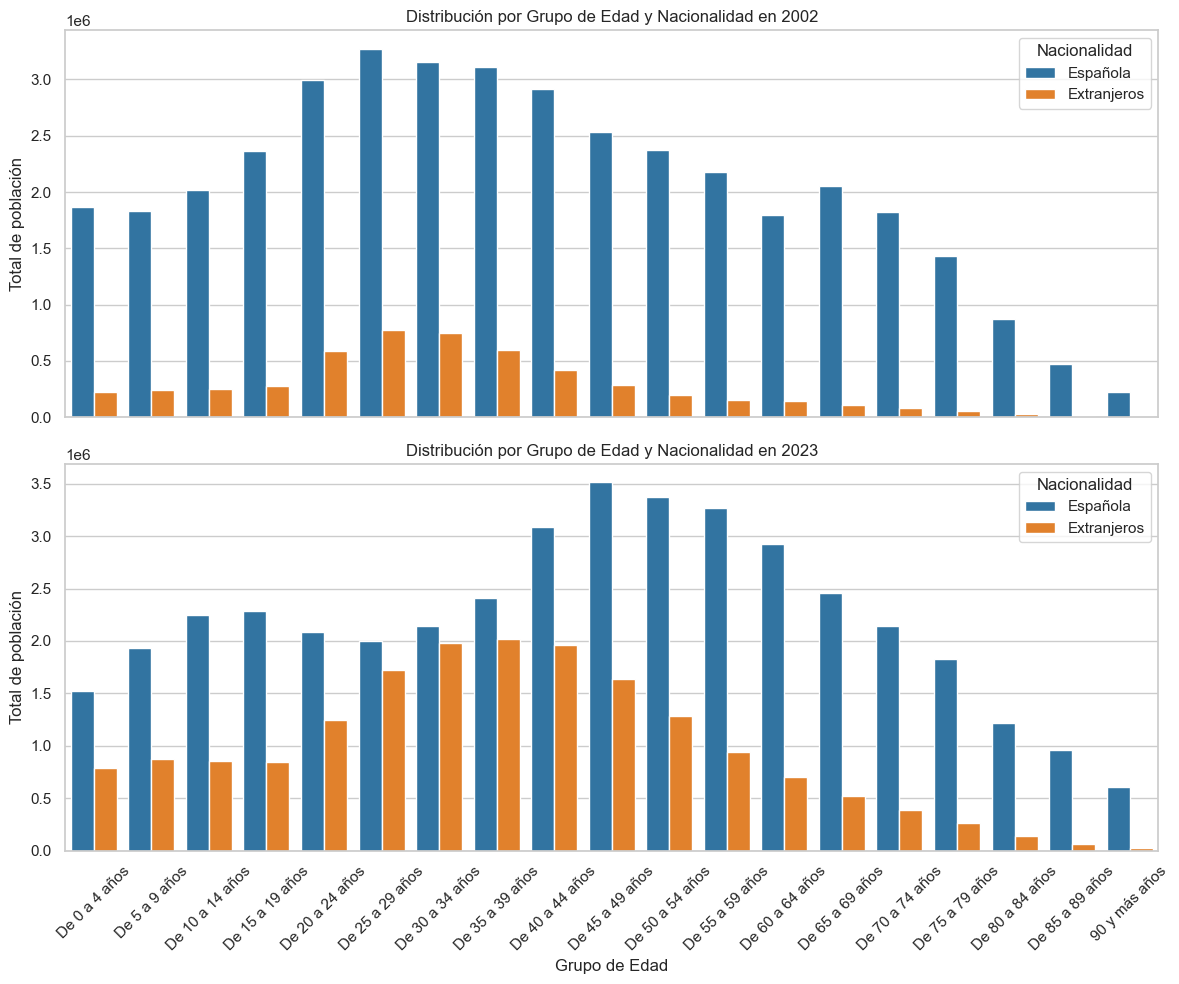

La suma  de los española en las edades de 20 a 39 años,  en 2002 12536001 y para el año 2023 es 13235363
La suma  de los extranjeros en las edades de 20 a 39 años,  en 2002 2708138 y para el año 2023 es 5824923


In [24]:
# Validar la distribucion respetando extranjeros y españoles

#agregar columna para clasificar si son extrajeros o españoles

df_01_2002['EspVsExt'] = np.where(df_01_2002['nacionalidad'] == 'Española', 'Española', 'Extranjeros')
df_01_2023['EspVsExt'] = np.where(df_01_2023['nacionalidad'] == 'Española', 'Española', 'Extranjeros')

# se agrupa por las columnas  grupo de edad y EspVsExt

df_i = df_01_2002.groupby(['grupo_edad','EspVsExt'])['total'].sum().reset_index()
df_f = df_01_2023.groupby(['grupo_edad','EspVsExt'])['total'].sum().reset_index()

#aplicar la funcion parse_age_range 
df_i['Intervalo_edad'] = [parse_age_range(age) for age in df_i['grupo_edad']]
df_f['Intervalo_edad'] = [parse_age_range(age) for age in df_f['grupo_edad']]

df_i = df_i.sort_values(by = 'Intervalo_edad')
df_f = df_f.sort_values(by = 'Intervalo_edad')


# Configuración de estilo
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Gráfico de barras para 2002
sns.barplot(x='grupo_edad', y='total', hue='EspVsExt', data=df_i, ax=ax[0], palette='tab10')
ax[0].set_title('Distribución por Grupo de Edad y Nacionalidad en 2002')
ax[0].set_ylabel('Total de población')
ax[0].set_xlabel('')
ax[0].legend(title='Nacionalidad')

# Gráfico de barras para 2023
sns.barplot(x='grupo_edad', y='total', hue='EspVsExt', data=df_f, ax=ax[1], palette='tab10')
ax[1].set_title('Distribución por Grupo de Edad y Nacionalidad en 2023')
ax[1].set_ylabel('Total de población')
ax[1].set_xlabel('Grupo de Edad')
ax[1].legend(title='Nacionalidad')

# Ajustar etiquetas y formato
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#diferencia de la poblacion de 20 a 40 entre el 2002 y el 2023
lista  = ['De 20 a 24 años','De 25 a 29 años','De 30 a 34 años','De 35 a 39 años']
lista2  = ['De 40 a 44 años','De 45 a 49 años','De 50 a 54 años','De 55 a 59 años']
df_filtrado1 = df_i[(df_i['grupo_edad'].isin(lista)) & (df_i['EspVsExt'] == 'Española')]
df_filtrado2 = df_f[(df_f['grupo_edad'].isin(lista2)) & (df_f['EspVsExt'] == 'Española')]

df_filtrado3 = df_i[(df_i['grupo_edad'].isin(lista)) & (df_i['EspVsExt'] != 'Española')]
df_filtrado4 = df_f[(df_f['grupo_edad'].isin(lista2)) & (df_f['EspVsExt'] != 'Española')]

a = df_filtrado1['total'].sum()
b = df_filtrado2['total'].sum()
c = df_filtrado3['total'].sum()
d = df_filtrado4['total'].sum()

print(f'La suma  de los española en las edades de 20 a 39 años,  en 2002 {a} y para el año 2023 es {b}')

print(f'La suma  de los extranjeros en las edades de 20 a 39 años,  en 2002 {c} y para el año 2023 es {d}')





Podemos ver que las personas que nacieron en 1962 a 1982  que en 2002 tenian entre 20-40 años es aproximado de 12 millones , en 2023 es aproximadamente 13 millones , un curioso crecimiento , que se puede deber al reingreso de españoles que vivian en otra partes , mientras que en el caso de los extranjero se duplicaron , en 2002 para un 2.7 millones a 2023 con un 5.8 millones 

Tambien podemos notar un decrecimiento en la juventud vastante significativo , pero tambien podemos ver un crecimiento en los nacimientos de extranjeros o la mudanza de familias con hijos 

***Prediccion de comportamiento de poblacion**

Usaremos los siguientes modelos para predecir el comportamiento de la poblacion 
- Regresion Lineal
- Arboles de decion 
- Redes Neuronales
- Modelos de series temporales (ARIMA , SARIMA)

Escogeremos el mejor modelo 


**Regresion Lineal**



In [29]:
# Importar librerias 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Asegurar que las fechas sean interpretadas correctamente
register_matplotlib_converters()



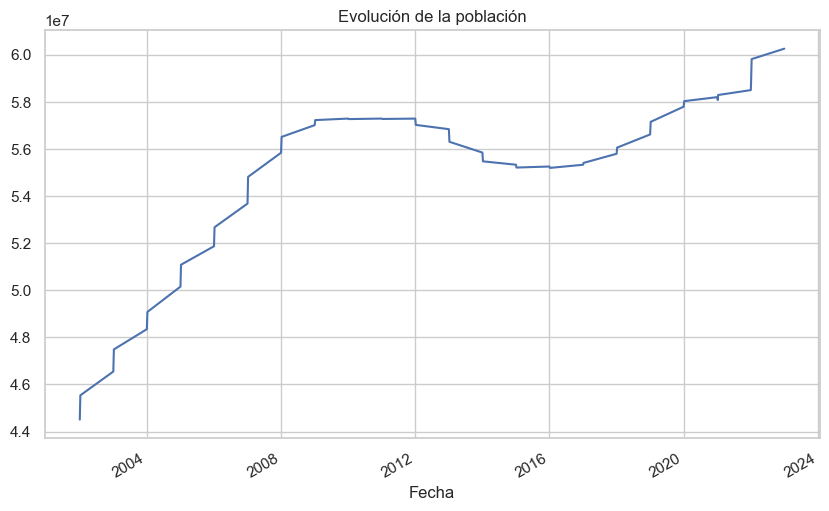

In [37]:
#Definir Datos 

poblacion_historica = df.groupby('fecha_convertida')['total'].sum().reset_index()

#Preparar los datos para modelazion 

poblacion_historica['Fecha'] = pd.to_datetime(poblacion_historica['fecha_convertida'])

# Establecer la fecha como índice (necesario para ARIMA)

df_org = poblacion_historica[['Fecha','total']]
df_org.set_index('Fecha', inplace=True)


# Graficar la serie temporal
df_org['total'].plot(figsize=(10, 6))
plt.title('Evolución de la población')
plt.show()

In [60]:

# Crear y entrenar el modelo ARIMA
model = ARIMA(df_org['total'], order=(5, 1, 0))  # Orden (p, d, q)
model_fit = model.fit()

# Hacer predicciones para los próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Vamos a crear un rango de fechas continuas empezando desde la última fecha conocida
start_date = '2023-01-01'  # Última fecha conocida
num_months_forecast = len(forecast)  # Número de meses que se están prediciendo

# Crear un rango de fechas mensuales continuas
forecast_dates = pd.date_range(start=start_date, periods=num_months_forecast, freq='M')

# Asignar estas fechas como índice al DataFrame de forecast
forecast.index = forecast_dates

# Convierte las fechas en el índice del DataFrame a datetime, por si acaso
forecast.index = pd.to_datetime(forecast.index)

# Mostrar el DataFrame de forecast con las fechas continuas
print("Predicción para los próximos 12 meses:")
print(forecast.info())
print(df_org.info())



Predicción para los próximos 12 meses:
<class 'pandas.core.series.Series'>
DatetimeIndex: 12 entries, 2023-01-31 to 2023-12-31
Freq: ME
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2002-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes
None


/Users/joserios/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joserios/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joserios/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/joserios/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an int

In [63]:
forecast

2023-01-31    6.030072e+07
2023-02-28    6.033918e+07
2023-03-31    6.036902e+07
2023-04-30    6.038887e+07
2023-05-31    6.039960e+07
2023-06-30    6.040257e+07
2023-07-31    6.040463e+07
2023-08-31    6.040592e+07
2023-09-30    6.040663e+07
2023-10-31    6.040698e+07
2023-11-30    6.040713e+07
2023-12-31    6.040722e+07
Freq: ME, Name: predicted_mean, dtype: float64

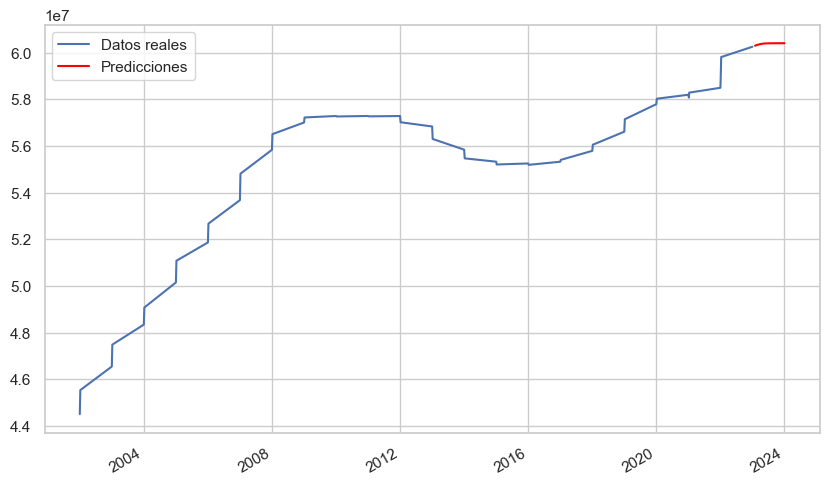

In [69]:

# si no, usa forecast.index = pd.date_range() para generarlo correctamente
plt.figure(figsize=(10,6))

# Graficar los datos reales
plt.plot(df_org.index, df_org['total'], label='Datos reales')

# Graficar las predicciones, usando el índice de forecast
plt.plot(forecast.index, forecast.values, label='Predicciones', color='red')

# Mostrar la leyenda
plt.legend()

# Ajustar el formato de las fechas en el eje x
plt.gcf().autofmt_xdate()

# Mostrar la gráfica
plt.show()


**Evaluacion del modelo** 

Para evaluar este modelo le pediremos calcular los ultimos 3 registros , que tenemos del data frame original y miraremos diferentes metricas como:

- Error Cuadratico Medio (MSE)
- Raíz del Error Cuadrático Medio (RMSE)
- Error Absoluto Medio (MAE)
- Coeficiente de Determinación (R²)

In [127]:
# Entrenar el modelo con todos los datos excepto los últimos 3 meses
train_data = df_org.iloc[:-3]

# Últimos 12 meses reales para comparar
real_data = df_org['total'].iloc[-3:]

In [128]:
# Supongamos que `modelo` es el modelo que ya has entrenado.
# Hacer predicciones sobre los últimos 3 meses
forecast = model_fit.predict(start=len(train_data), end=len(df_org)-1)
forecast = forecast.apply(lambda x: format(x, ',.0f'))
forecast = forecast.str.replace(',', '').astype(int)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular MSE
mse = mean_squared_error(real_data, forecast)
print(f'MSE: {mse}')

# Calcular RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Calcular MAE
mae = mean_absolute_error(real_data, forecast)
print(f'MAE: {mae}')

# Calcular R²
r2 = r2_score(real_data, forecast)
print(f'R²: {r2}')

# Calcular MAPE
mape = np.mean(np.abs((real_data - forecast) / real_data)) * 100
print(f'MAPE: {mape:.2f}%')



MSE: 190469896974.0
RMSE: 436428.5702998831
MAE: 435649.3333333333
R²: -0.3839514730184781
MAPE: 0.73%


los errores son muy grandes , no se me hace mucho sentido 
ta que la diferencia no es mucha 


In [130]:
real_data = real_data.reset_index()
forecast = forecast.reset_index()
meerge = real_data.merge(forecast , on= 'Fecha')

In [133]:
meerge['variacion'] =((meerge['predicted_mean']/meerge['total'])-1)*100 
meerge['diferencia'] = ((meerge['predicted_mean'] - meerge['total']))
meerge

,Fecha,total,predicted_mean,diferencia,variacion
0,2022-01-07,59347967,58881183,-466784,-0.786521
1,2022-01-10,59814202,59377023,-437179,-0.730895
2,2023-01-01,60256579,59853594,-402985,-0.668782


es facil notar que la variacion no es mucha en ningun caso , no alcanza a ser ni el 1%
vamos a intentar escalar los datos 